In [1]:
def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        #if not os.path.exists(filename):
        #    download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 784)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        #if not os.path.exists(filename):
        #    download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    script_dir=os.getcwd()
    rel_path="Input_data/"
    abs_path=os.path.join(script_dir,rel_path)
    X_train = load_mnist_images(abs_path+'train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels(abs_path+'train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images(abs_path+'t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels(abs_path+'t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [2]:
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
%matplotlib inline

X_train, y_train, X_val, y_val, X_test, y_test=load_dataset()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
X_train=X_train.reshape((50000,784))

In [5]:
rd_1=784
rd_2=50

In [4]:
from sklearn.decomposition import PCA
PCA_in_train=X_train.reshape(50000,784)
PCA_in_val=X_val.reshape(10000,784)
PCA_in_test=X_test.reshape(10000,784)

In [5]:
pca=PCA(n_components=784)
pca_train=pca.fit(PCA_in_train)

In [6]:
PCA_vectors=pca.components_

In [7]:
PCA_vectors.shape

(784, 784)

In [8]:
PCA_vectors=np.transpose(np.array(PCA_vectors))

A=np.dot(X_train,PCA_vectors)

### The in-built PCA automatically subtracts the per-dimension mean for all axes

A-X_train_dr

pca_proj_sum=np.sum(np.absolute(X_train_dr),axis=1)

np.where(X_train<0)

np.where(PCA_vectors<0)

In [12]:
PCA_abs=np.absolute(PCA_vectors)

scores=np.zeros(784)
for i in range(784):
    for j in range(rd_1):
        scores[i]=scores[i]+np.sum(X_train[:,i]*PCA_vectors[i,j])

In [ ]:
scores_abs=np.zeros(784)
for i in range(784):
    for j in range(rd_1):
        scores_abs[i]=scores_abs[i]+np.sum(X_train[:,i]*PCA_abs[i,j])

In [13]:
scores_diff=np.zeros(784)
PCA_vectors_rd=PCA_vectors[:,0:rd_2]
for i in range(784):
    scores_diff[i]=np.linalg.norm(PCA_vectors_rd[i,:])**2

NameError: name 'rd_2' is not defined

In [12]:
scores_trial=np.zeros(784)
for i in range(784):
    scores_trial[i]=np.linalg.norm(PCA_vectors[i,0:rd_2])**2

In [11]:
#top_features_abs=np.argsort(scores_abs)[::-1][:40]
#top_features=np.argsort(scores)[::-1][:40]
top_features_diff=np.argsort(scores_diff)[::-1][:50]
top_features_trial=np.argsort(scores_trial)[::-1][:50]

NameError: name 'scores_trial' is not defined

In [32]:
top_features_trial

array([214, 213, 183, 184, 215, 463, 382, 242, 185, 408, 410, 270, 465,
       435, 212, 403, 243, 268, 407, 464, 182, 240, 436, 211, 296, 381,
       409, 210, 239, 437, 406, 404, 324, 458, 354, 629, 298, 438, 432,
       376, 241, 628, 599, 460, 353, 209, 352, 491, 431, 459])

In [ ]:
top_features

In [ ]:
np.argsort(abs(w_curr))[::-1][:40]

In [33]:
top_features_diff

array([214, 213, 183, 184, 215, 463, 382, 242, 185, 408, 410, 270, 465,
       435, 212, 403, 243, 268, 407, 464, 182, 240, 436, 211, 296, 381,
       409, 210, 239, 437, 406, 404, 324, 458, 354, 629, 298, 438, 432,
       376, 241, 628, 599, 460, 353, 209, 352, 491, 431, 459])

top_features_abs

for i in range(50000):
    np.put(zero_array[i,:],top_features_diff,1)

adv_x=X_train+1.0*zero_array

X_train_inc_adv=np.vstack((X_train,adv_x))

X_train_inc_adv.shape

y_train_new=np.hstack((y_train,y_train))

y_train_new.shape

In [14]:
from sklearn import svm

clf=svm.LinearSVC(dual=False)

clf.fit(X_train,y_train)

X_val=X_val.reshape((10000,784))

val_out=out=clf.predict(X_val)

validation_success=(10000-np.count_nonzero(val_out-y_val))/10000.0

In [15]:
validation_success

0.9206

In [16]:
X_test=X_test.reshape((10000,784))

test_out=clf.predict(X_test)

test_success=(10000-np.count_nonzero(test_out-y_test))/10000.0

In [17]:
test_success

0.9153

In [19]:
for i in range(10):
    print np.max(clf.coef_[i]/np.linalg.norm(clf.coef_[i]))

0.16865172113
0.134652483028
0.232637233301
0.209641109803
0.149310414993
0.31920212099
0.14701382781
0.197690301536
0.140349875147
0.154325002074


In [38]:
svm_coef_matrix=np.zeros((784))
for i in range(784):
    svm_coef_matrix[i]=np.linalg.norm(clf.coef_[:,i])**2

In [39]:
top_features_svm=np.argsort(svm_coef_matrix)[::-1][:50]

In [40]:
top_features_svm

array([362, 360, 417, 418, 332, 473, 557, 361, 283, 388, 119, 446, 718,
       503, 173, 333, 311, 647, 391, 277, 306,  93,  96, 501, 248, 193,
        44, 279, 359, 705, 529, 200, 695, 564, 334,  97, 122, 276, 612,
        66,  70, 145, 304,  95, 648, 500, 613, 619, 144, 108])

In [41]:
np.intersect1d(top_features_svm,top_features_diff)

array([], dtype=int64)

count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
print_flag=0
for i in range(50000):
    x_ini=(X_train[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    #x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
    x_adv=adv_x[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_train[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv=count_pure_adv+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        print_flag=print_flag+1
print count_wrong/50000.0, count_adv/50000.0, count_pure_adv/50000.0

In [42]:
X_adv=np.zeros((50000,784))
X_adv_new=np.zeros((50000,784))

In [55]:
X_adv_test=np.zeros((10000,784))
X_adv_new_test=np.zeros((10000,784,5))

In [ ]:
list_1=[1.0,2.0,3.0,4.0,5.0]
list_2=[1.0,1.0,1.0,1.0,0.5]
for j in range(5):
    count_pure_adv=0.0
    count_adv=0.0
    count_wrong=0.0
    count_correct=0.0
    print_flag=0
    avg_norm=0.0
    for i in range(10000):
        x_ini=(X_test[i,:]).reshape((1,784))
        ini_class=clf.predict(x_ini)
        delta_x=np.zeros((784))
        w_curr=clf.coef_[ini_class[0],:]
        w_curr_mod=np.linalg.norm(w_curr)
        delta_x[top_features_diff]=list_1[j]*(w_curr[top_features_diff]/w_curr_mod)
        #delta_x[top_features_diff]=-1
        mask = np.ones(784, dtype=bool)
        mask[top_features_diff] = False
        curr_mag=np.sqrt((1.0-np.linalg.norm(delta_x[top_features_diff])**2)/np.linalg.norm(w_curr[mask]/w_curr_mod))
        delta_x[mask]=curr_mag*(w_curr[mask]/w_curr_mod)
        x_adv_new=np.clip(x_ini-delta_x,0,1)
        #x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
        X_adv_new_test[i,:,j]=x_adv_new
        avg_norm=avg_norm+np.linalg.norm(delta_x)
        #x_adv=adv_x[i,:].reshape((1,784))
        final_class=clf.predict(x_adv_new)
        if ini_class[0]!=final_class[0]:
            count_adv=count_adv+1
        if y_test[i]!=final_class[0]:
            count_wrong=count_wrong+1
        if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
            count_pure_adv=count_pure_adv+1
        if ini_class[0]==y_test[i]:
            count_correct=count_correct+1
    #     if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
    #         #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    #         #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    #         print_flag=print_flag+1
    print count_wrong/10000.0, count_adv/10000.0, count_pure_adv/count_correct, avg_norm/10000.0

In [44]:
count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
count_correct=0.0
print_flag=0
for i in range(50000):
    x_ini=(X_train[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    delta_x=np.zeros((784))
    w_curr=clf.coef_[ini_class[0],:]
    w_curr_mod=np.linalg.norm(w_curr)
    delta_x[top_features_svm]=1.0*(w_curr[top_features_svm]/w_curr_mod)
    x_adv=(x_ini-delta_x).reshape((1,784))
#     X_adv[i,:]=x_adv
    #x_adv=adv_x[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_train[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv=count_pure_adv+1
    if ini_class[0]==y_train[i]:
        count_correct=count_correct+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        print_flag=print_flag+1
print count_wrong/50000.0, count_adv/50000.0, count_pure_adv/count_correct

0.66984 0.70642 0.683803683631


In [45]:
count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
count_correct=0.0
print_flag=0
for i in range(50000):
    x_ini=(X_train[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
    X_adv[i,:]=x_adv
    #x_adv=adv_x[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_train[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv=count_pure_adv+1
    if ini_class[0]==y_train[i]:
        count_correct=count_correct+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        print_flag=print_flag+1
print count_wrong/50000.0, count_adv/50000.0, count_pure_adv/count_correct

0.9595 0.99976 0.999740893486


In [46]:
count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
count_correct=0.0
print_flag=0
for i in range(50000):
    x_ini=(X_train[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    delta_x=np.zeros((784))
    w_curr=clf.coef_[ini_class[0],:]
    w_curr_mod=np.linalg.norm(w_curr)
    delta_x[top_features_diff]=5.0*(w_curr[top_features_diff]/w_curr_mod)
    #delta_x[top_features_diff]=-1
    mask = np.ones(784, dtype=bool)
    mask[top_features_diff] = False
    delta_x[mask]=0.5*(w_curr[mask]/w_curr_mod)
    x_adv_new=x_ini-delta_x
    #x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
    X_adv_new[i,:]=x_adv_new
    #x_adv=adv_x[i,:].reshape((1,784))
    final_class=clf.predict(x_adv_new)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_train[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv=count_pure_adv+1
    if ini_class[0]==y_train[i]:
        count_correct=count_correct+1
#     if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
#         #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
#         #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
#         print_flag=print_flag+1
print count_wrong/50000.0, count_adv/50000.0, count_pure_adv/count_correct

0.92022 0.96442 0.961587459245


In [47]:
count_pure_adv=0.0
count_adv=0.0
count_wrong=0.0
count_correct=0.0
print_flag=0
for i in range(10000):
    x_ini=(X_test[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
    x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
    X_adv_test[i,:]=x_adv
    #x_adv=adv_x[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv=count_adv+1
    if y_test[i]!=final_class[0]:
        count_wrong=count_wrong+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
        count_pure_adv=count_pure_adv+1
    if ini_class[0]==y_test[i]:
        count_correct=count_correct+1
    #if y_test[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        print_flag=print_flag+1
print count_wrong/10000.0, count_adv/10000.0, count_pure_adv/count_correct

0.9538 0.9997 0.99967223861


In [47]:
rd_list=[331,100,50,40,30,20,10]
X_adv_new_test=np.zeros((10000,784,10))
for rd_2 in rd_list:
    counter=0
    print rd_2
    list_1=np.linspace(1.0,10.0,10)
    scores_diff=np.zeros(784)
    PCA_vectors_rd=PCA_vectors[:,0:rd_2]
    for i in range(784):
        scores_diff[i]=np.linalg.norm(PCA_vectors_rd[i,:])**2
    top_features_diff=np.argsort(scores_diff)[::-1][:50]
    for j in range(5):
        DEV_MAG=list_1[j]
        count_pure_adv=0.0
        count_adv=0.0
        count_wrong=0.0
        count_correct=0.0
        print_flag=0
        avg_norm=0.0
        break_flag=0
        for i in range(10000):
            x_ini=(X_test[i,:]).reshape((1,784))
            ini_class=clf.predict(x_ini)
            delta_x=np.zeros((784))
            w_curr=clf.coef_[ini_class[0],:]
            w_curr_mod=np.linalg.norm(w_curr)
            delta_x[top_features_diff]=list_1[j]*(w_curr[top_features_diff]/w_curr_mod)
            #delta_x[top_features_diff]=-1
            mask = np.ones(784, dtype=bool)
            mask[top_features_diff] = False
            if np.linalg.norm(delta_x[top_features_diff])**2>1:
                break_flag=1
                break
            curr_mag=np.sqrt((1.0-np.linalg.norm(delta_x[top_features_diff])**2)/np.linalg.norm(w_curr[mask]/w_curr_mod))
            delta_x[mask]=curr_mag*(w_curr[mask]/w_curr_mod)
            x_adv_new=np.clip(x_ini-delta_x,0,1)
            #x_adv=(x_ini-1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))).reshape((1,784))
            X_adv_new_test[i,:,j]=x_adv_new
            avg_norm=avg_norm+np.linalg.norm(delta_x)
            #x_adv=adv_x[i,:].reshape((1,784))
            final_class=clf.predict(x_adv_new)
            if ini_class[0]!=final_class[0]:
                count_adv=count_adv+1
            if y_test[i]!=final_class[0]:
                count_wrong=count_wrong+1
            if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
                count_pure_adv=count_pure_adv+1
            if ini_class[0]==y_test[i]:
                count_correct=count_correct+1
        #     if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #         #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #         #plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #         print_flag=print_flag+1
        if break_flag==0:
            print count_wrong/10000.0, count_adv/10000.0, count_pure_adv/count_correct, avg_norm/10000.0
            plotfile=open('Strategic_attack_SVM_PCA_retrain'+str(rd_2)+'.txt','a')
            # print("Deviation {} took {:.3f}s".format(
            #     DEV_MAG, time.time() - start_time))
            plotfile.write(str(rd_2)+","+str(DEV_MAG)+","+
                            str(count_wrong/10000.0*100.0)+","+
                            #str.format("{0:.3f}",conf_wrong/count_tot)+","+
                            str(count_adv/10000.0*100.0)+","+
                            #str.format("{0:.3f}",conf_adv/count_tot)+","+
                            str.format("{0:.3f}",count_pure_adv/count_correct*100.0)+","+
                            #str.format("{0:.3f}",conf_abs/count_tot)+","+
                            str.format("{0:.3f}",avg_norm/10000.0)+","+
                            str(0)+"\n")
            plotfile.close()
            counter=counter+1
    pca_2=PCA(n_components=rd_2)
    pca_train=pca_2.fit(PCA_in_train)
    X_train_dr=pca_2.transform(PCA_in_train).reshape((50000,rd_2))
    X_test_dr=pca_2.transform(PCA_in_test).reshape((10000,rd_2))
    clf_pca=svm.LinearSVC(dual=False)
    clf_pca.fit(X_train_dr,y_train)
    for j in range(counter):
        X_adv_new_test_dr=pca_2.transform(X_adv_new_test[:,:,j])
        count_pure_adv_pca=0.0
        count_adv_pca=0.0
        count_wrong_pca=0.0
        count_correct_pca=0.0
        avg_norm_pca=0.0
        #print_flag_pca=0
        for i in range(10000):
            x_ini=(X_test_dr[i,:]).reshape((1,rd_2))
            ini_class=clf_pca.predict(x_ini)
            #x_adv=(x_ini-1.0*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
            x_adv_dr=X_adv_new_test_dr[i,:].reshape((1,rd_2))
            final_class=clf_pca.predict(x_adv_dr)
            avg_norm_pca=avg_norm_pca+np.linalg.norm(x_adv_dr-x_ini)
            if ini_class[0]!=final_class[0]:
                count_adv_pca=count_adv_pca+1
            if y_test[i]!=final_class[0]:
                count_wrong_pca=count_wrong_pca+1
            if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
                count_pure_adv_pca=count_pure_adv_pca+1
            if ini_class[0]==y_test[i]:
                count_correct_pca=count_correct_pca+1
            #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
                #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
                #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
                #print_flag=print_flag+1
        print count_wrong_pca/10000.0, count_adv_pca/10000.0, count_pure_adv_pca/count_correct_pca
        plotfile=open('Strategic_attack_SVM_PCA_retrain'+str(rd_2)+'.txt','a')
        # print("Deviation {} took {:.3f}s".format(
        #     DEV_MAG, time.time() - start_time))
        plotfile.write(str(rd_2)+","+str(DEV_MAG)+","+
                        str(count_wrong_pca/10000.0*100.0)+","+
                        #str.format("{0:.3f}",conf_wrong/count_tot)+","+
                        str(count_adv_pca/10000.0*100.0)+","+
                        #str.format("{0:.3f}",conf_adv/count_tot)+","+
                        str.format("{0:.3f}",count_pure_adv_pca/count_correct_pca*100.0)+","+
                        #str.format("{0:.3f}",conf_abs/count_tot)+","+
                        str.format("{0:.3f}",avg_norm_pca/10000.0)+","+
                        str(0)+"\n")
        plotfile.close()

331
0.9316 0.9747 0.972358789468 0.997370807253
0.9311 0.9746 0.972249535671 0.997496851563
0.9278 0.9714 0.968753414181 0.997706792867
0.9207 0.9646 0.961324156014 0.998000433317
0.8972 0.9413 0.935868021414 0.998377497855
0.3599 0.3685 0.335914494492
0.3707 0.3799 0.347911440724
0.3747 0.3846 0.352819282364
0.376 0.3862 0.354455229578
0.3653 0.375 0.342785472789
100
0.9316 0.9747 0.972358789468 0.996816035021
0.9312 0.9748 0.972468043265 0.996994301723
0.9274 0.9716 0.968971921774 0.997291195107
0.9191 0.9639 0.960559379438 0.997706390376
0.8855 0.931 0.924614880367 0.998239436539
0.0998 0.0419 0.0256466462078
0.1012 0.0466 0.0284962735642
0.1023 0.0514 0.031565103025
0.1037 0.0545 0.0338667251206
0.106 0.0574 0.0364971503726
50
0.9317 0.9748 0.972468043265 0.997131911745
0.9314 0.9746 0.972249535671 0.997270795043
0.9277 0.9718 0.969190429367 0.997502149587
0.921 0.9653 0.96208893259 0.997825799661
0.9002 0.9452 0.94012891948 0.998241500678
0.1057 0.0232 0.0147499168238
0.1056 0.025

In [46]:
counter

15

In [31]:
delta_x_old=1.0*(clf.coef_[ini_class[0],:]/(np.linalg.norm(clf.coef_[ini_class[0],:])))

In [32]:
np.linalg.norm(delta_x_old)

1.0000000000000002

In [33]:
np.sqrt((np.linalg.norm(delta_x_old)**2))

0.035714285714285719

In [34]:
np.sqrt((np.linalg.norm(delta_x)**2))

0.038244105151709146

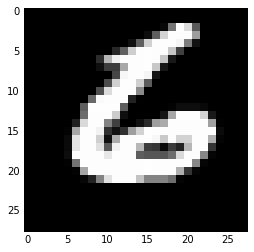

In [97]:
plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)

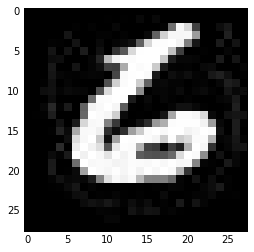

In [98]:
plt.imshow(((x_adv).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)

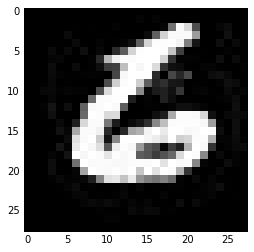

In [99]:
plt.imshow(((x_adv_new).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)

In [35]:
#X_train_new_dr=pca.transform(X_train_inc_adv).reshape((100000,rd))
#Transforming the training, validation and test data
pca_2=PCA(n_components=rd_2)
pca_2.fit(PCA_in_train)
X_train_dr=pca_2.transform(PCA_in_train).reshape((50000,rd_2))
X_test_dr=pca_2.transform(PCA_in_test).reshape((10000,rd_2))
X_val_dr=pca_2.transform(PCA_in_val).reshape((10000,rd_2))
#X_adv_dr_test=pca_2.transform(adv_x_test).reshape((10000,rd_2))
clf_pca=svm.LinearSVC(dual=False)

clf_pca.fit(X_train_dr,y_train)

val_out_pca=clf_pca.predict(X_val_dr)
validation_success_pca=(10000-np.count_nonzero(val_out_pca-y_val))/10000.0

In [36]:
X_train_rev=pca_2.inverse_transform(X_train_dr)
X_test_rev=pca_2.inverse_transform(X_test_dr)

In [37]:
validation_success_pca

0.9003

In [38]:
test_out_pca=clf_pca.predict(X_test_dr)

test_success_pca=(10000-np.count_nonzero(test_out_pca-y_test))/10000.0

In [39]:
test_success_pca

0.8964

In [40]:
X_adv_dr=pca_2.transform(X_adv).reshape((50000,rd_2))
X_adv_new_dr=pca_2.transform(X_adv_new).reshape((50000,rd_2))
X_adv_rev=pca_2.inverse_transform(X_adv_dr)
X_adv_new_rev=pca_2.inverse_transform(X_adv_new_dr)

In [41]:
X_adv_test_dr=pca_2.transform(X_adv_test).reshape((10000,rd_2))
X_adv_new_test_dr=pca_2.transform(X_adv_new_test).reshape((10000,rd_2))
X_adv_rev_test=pca_2.inverse_transform(X_adv_test_dr)
X_adv_new_rev_test=pca_2.inverse_transform(X_adv_new_test_dr)

count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
#print_flag_pca=0
for i in range(50000):
    x_ini=(X_train_dr[i,:]).reshape((1,rd_2))
    ini_class=clf_pca.predict(x_ini)
    x_adv=(x_ini-1.0*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    #x_adv=X_adv_dr[i,:].reshape((1,rd_2))
    final_class=clf_pca.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_train[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/50000.0, count_adv_pca/50000.0, count_pure_adv_pca/50000.0

### Reconstruction based

In [42]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(50000):
    x_ini=(X_train_rev[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
#     x_adv_dr=(x_ini-0.3*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv=X_adv_rev[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_train[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_train[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/50000.0, count_adv_pca/50000.0, count_pure_adv_pca/count_correct_pca

0.1429 0.0368 0.0304290519044


In [43]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(50000):
    x_ini=(X_train_rev[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
#     x_adv_dr=(x_ini-0.3*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv=X_adv_new_rev[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_train[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_train[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/50000.0, count_adv_pca/50000.0, count_pure_adv_pca/count_correct_pca

0.1678 0.07164 0.0621988910099


In [44]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(10000):
    x_ini=(X_test_rev[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
#     x_adv_dr=(x_ini-0.3*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv=X_adv_rev_test[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_test[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_test[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/10000.0, count_adv_pca/10000.0, count_pure_adv_pca/count_correct_pca

0.128 0.0356 0.0259930235175


In [45]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(10000):
    x_ini=(X_test_rev[i,:]).reshape((1,784))
    ini_class=clf.predict(x_ini)
#   x_adv_dr=(x_ini-0.3*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv=X_adv_new_rev_test[i,:].reshape((1,784))
    final_class=clf.predict(x_adv)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_test[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_test[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/10000.0, count_adv_pca/10000.0, count_pure_adv_pca/count_correct_pca

0.1494 0.0685 0.054011477439


### Re-training unaware defense

In [46]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(50000):
    x_ini=(X_train_dr[i,:]).reshape((1,rd_2))
    ini_class=clf_pca.predict(x_ini)
    #x_adv=(x_ini-1.0*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv_dr=X_adv_dr[i,:].reshape((1,rd_2))
    final_class=clf_pca.predict(x_adv_dr)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_train[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_train[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/50000.0, count_adv_pca/50000.0, count_pure_adv_pca/count_correct_pca

0.13124 0.02988 0.0237170220455


In [47]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(50000):
    x_ini=(X_train_dr[i,:]).reshape((1,rd_2))
    ini_class=clf_pca.predict(x_ini)
    #x_adv=(x_ini-1.0*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv_dr=X_adv_new_dr[i,:].reshape((1,rd_2))
    final_class=clf_pca.predict(x_adv_dr)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_train[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_train[i]!=final_class[0] and ini_class[0]==y_train[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_train[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/50000.0, count_adv_pca/50000.0, count_pure_adv_pca/count_correct_pca

0.15464 0.06468 0.0542103361041


In [48]:
count_pure_adv_pca=0.0
count_adv_pca=0.0
count_wrong_pca=0.0
count_correct_pca=0.0
#print_flag_pca=0
for i in range(10000):
    x_ini=(X_test_dr[i,:]).reshape((1,rd_2))
    ini_class=clf_pca.predict(x_ini)
    #x_adv=(x_ini-1.0*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
    x_adv_dr=X_adv_test_dr[i,:].reshape((1,rd_2))
    final_class=clf_pca.predict(x_adv_dr)
    if ini_class[0]!=final_class[0]:
        count_adv_pca=count_adv_pca+1
    if y_test[i]!=final_class[0]:
        count_wrong_pca=count_wrong_pca+1
    if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
        count_pure_adv_pca=count_pure_adv_pca+1
    if ini_class[0]==y_test[i]:
        count_correct_pca=count_correct_pca+1
    #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
        #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
        #print_flag=print_flag+1
print count_wrong_pca/10000.0, count_adv_pca/10000.0, count_pure_adv_pca/count_correct_pca

0.1173 0.0288 0.0210843373494


In [61]:
rd_list=[331,100,50,40,30,20,10]
for rd_2 in rd_list:
    print rd_2
    pca_2=PCA(n_components=rd_2)
    pca_train=pca_2.fit(PCA_in_train)
    X_train_dr=pca_2.transform(PCA_in_train).reshape((50000,rd_2))
    X_test_dr=pca_2.transform(PCA_in_test).reshape((10000,rd_2))
    clf_pca=svm.LinearSVC(dual=False)
    clf_pca.fit(X_train_dr,y_train)
    for j in range(5):
        X_adv_new_test_dr=pca_2.transform(X_adv_new_test[:,:,j])
        count_pure_adv_pca=0.0
        count_adv_pca=0.0
        count_wrong_pca=0.0
        count_correct_pca=0.0
        #print_flag_pca=0
        for i in range(10000):
            x_ini=(X_test_dr[i,:]).reshape((1,rd_2))
            ini_class=clf_pca.predict(x_ini)
            #x_adv=(x_ini-1.0*(clf_pca.coef_[ini_class[0],:]/(np.linalg.norm(clf_pca.coef_[ini_class[0],:])))).reshape((1,rd_2))
            x_adv_dr=X_adv_new_test_dr[i,:].reshape((1,rd_2))
            final_class=clf_pca.predict(x_adv_dr)
            if ini_class[0]!=final_class[0]:
                count_adv_pca=count_adv_pca+1
            if y_test[i]!=final_class[0]:
                count_wrong_pca=count_wrong_pca+1
            if y_test[i]!=final_class[0] and ini_class[0]==y_test[i]:
                count_pure_adv_pca=count_pure_adv_pca+1
            if ini_class[0]==y_test[i]:
                count_correct_pca=count_correct_pca+1
            #if y_train[i]!=final_class[0] and ini_class[0]==y_train[i] and print_flag==0:
                #plt.imshow((x_ini.reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
                #plt.imshow(((x_adv-x_ini).reshape((28,28)))*255, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
                #print_flag=print_flag+1
        print count_wrong_pca/10000.0, count_adv_pca/10000.0, count_pure_adv_pca/count_correct_pca

331
0.4384 0.4548 0.425455338641
0.4531 0.4704 0.441923873923
0.4618 0.4803 0.452066746646
0.4636 0.4834 0.45501145163
0.458 0.4783 0.44923110481
100
0.1055 0.0529 0.0339763261727
0.1075 0.0591 0.0381411661552
0.1109 0.0642 0.042525208242
0.1135 0.0691 0.0465804471723
0.1164 0.0736 0.0507452871548
50
0.1079 0.0287 0.0184096706222
0.1111 0.0343 0.0229566374626
0.1147 0.04 0.0278363091937
0.1178 0.0457 0.0324941776644
0.1206 0.0501 0.0361539314628
40
0.1172 0.0286 0.0209727800089
0.1198 0.0329 0.024765729585
0.1224 0.0372 0.0284471218206
0.1258 0.0425 0.0329094154395
0.1276 0.0465 0.0358099062918
30
0.1292 0.0258 0.0196943972835
0.132 0.0316 0.0242218449349
0.1362 0.0371 0.0292020373514
0.1399 0.0424 0.034182229768
0.1428 0.0469 0.0381437464629
20
0.1497 0.0259 0.0223760092272
0.154 0.0315 0.0276816608997
0.1572 0.036 0.0320645905421
0.1599 0.0402 0.0358708189158
0.1623 0.0442 0.0392156862745
10
0.2322 0.0182 0.0176900397385
0.2345 0.0212 0.0207665683887
0.2373 0.0253 0.0248686065889
0.2

### Average distortion per feature

In [50]:
np.sqrt((np.linalg.norm(x_ini-x_adv_dr)**2)/rd_2)

0.096714298177354899

In [51]:
np.sqrt((np.linalg.norm(x_ini-x_adv_new_dr)**2)/rd_2)

NameError: name 'x_adv_new_dr' is not defined